In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu, linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split

from utils import gen_data, gen_blob, LinModel

## **Data for Polynomial Regression Model**

In [2]:
X,y,x_ideal,y_ideal = gen_data(18, 2, 0.7)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=1)

In [4]:
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X_train.shape (12,) y_train.shape (12,)
X_test.shape (6,) y_test.shape (6,)


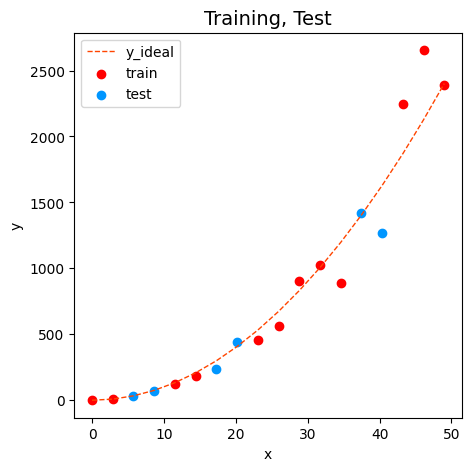

In [5]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(x_ideal, y_ideal, "--",color="orangered", label="y_ideal",lw=1)
ax.set_title("Training, Test", fontsize=14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color="red", label="train")
ax.scatter(X_test, y_test, color='#0096ff', label='test')
ax.legend(loc='upper left')
plt.show()

## **Polynomial Regression Model with and without Regularization**

In [6]:
degree = 10

linmodel = LinModel(degree=degree)
linmodel.fit(X_train=X_train, y_train=y_train)

In [7]:
ypred = linmodel.predict(X=X_train)
train_err = linmodel.mse(y=y_train, ypred=ypred)

In [8]:
ypred = linmodel.predict(X=X_test)
test_err = linmodel.mse(y=y_test, ypred=ypred)

In [9]:
print(f"Training error: {train_err:0.2f}, Testing error: {test_err:0.2f}")

Training error: 58.01, Testing error: 171215.01


In [10]:
x = np.linspace(0, int(X.max()), 100)
ypred = linmodel.predict(X=x).reshape(-1,1)

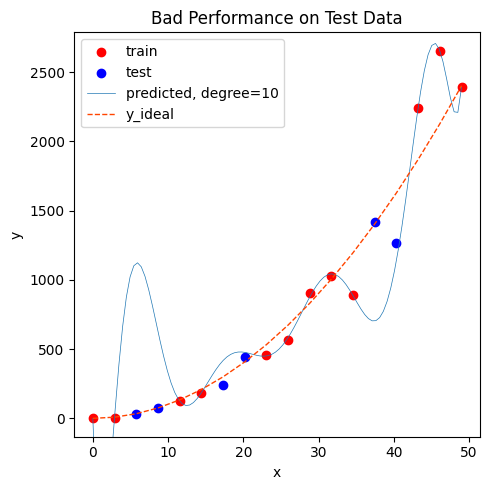

In [11]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

ax.set_title("Bad Performance on Test Data", fontsize=12)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color="red", label="train")
ax.scatter(X_test, y_test, color="blue", label="test")
ax.set_xlim(ax.get_xlim())
ax.set_ylim(ax.get_ylim())
ax.plot(x, ypred, lw=0.5, label=f"predicted, degree={degree}")
ax.plot(x_ideal, y_ideal, "--", color="orangered", label="y_ideal", lw=1)
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()

## **Fine tuning Regularization**

In [12]:
X,y,x_ideal,y_ideal = gen_data(40, 5, 0.7)
print("X.shape: ", X.shape, "y.shape: ", y.shape)

X.shape:  (40,) y.shape:  (40,)


In [13]:
X_train, X_some, y_train, y_some = train_test_split(X,y,test_size=0.40,random_state=1)
print("X_train.shape: ", X_train.shape, "y_train.shape: ", y_train.shape)

X_train.shape:  (24,) y_train.shape:  (24,)


In [14]:
X_cv, X_test, y_cv, y_test = train_test_split(X_some, y_some, test_size=0.50, random_state=1)
print("X_cv.shape: ", X_cv.shape, "y_cv.shape: ", y_cv.shape)
print("X_test.shape: ", X_test.shape, "y_test.shape: ", y_test.shape)

X_cv.shape:  (8,) y_cv.shape:  (8,)
X_test.shape:  (8,) y_test.shape:  (8,)


In [15]:
lambda_list = np.array([00, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
steps = len(lambda_list)
degree = 10
train_err = np.zeros(steps)
cv_err = np.zeros(steps)
x == np.linspace(0, int(X.max()), 100)
y_pred = np.zeros((100, steps))

In [16]:
for i in range(steps):
    lambda_ = lambda_list[i]
    linmodel = LinModel(degree=degree, regularization=True, lambda_=lambda_)
    linmodel.fit(X_train, y_train)
    ypred = linmodel.predict(X_train)
    train_err[i] = linmodel.mse(y_train, ypred)
    ypred = linmodel.predict(X_cv)
    cv_err[i] = linmodel.mse(y_cv, ypred)
    y_pred[:,i] = linmodel.predict(x)

optimal_reg_index = np.argmin(cv_err)

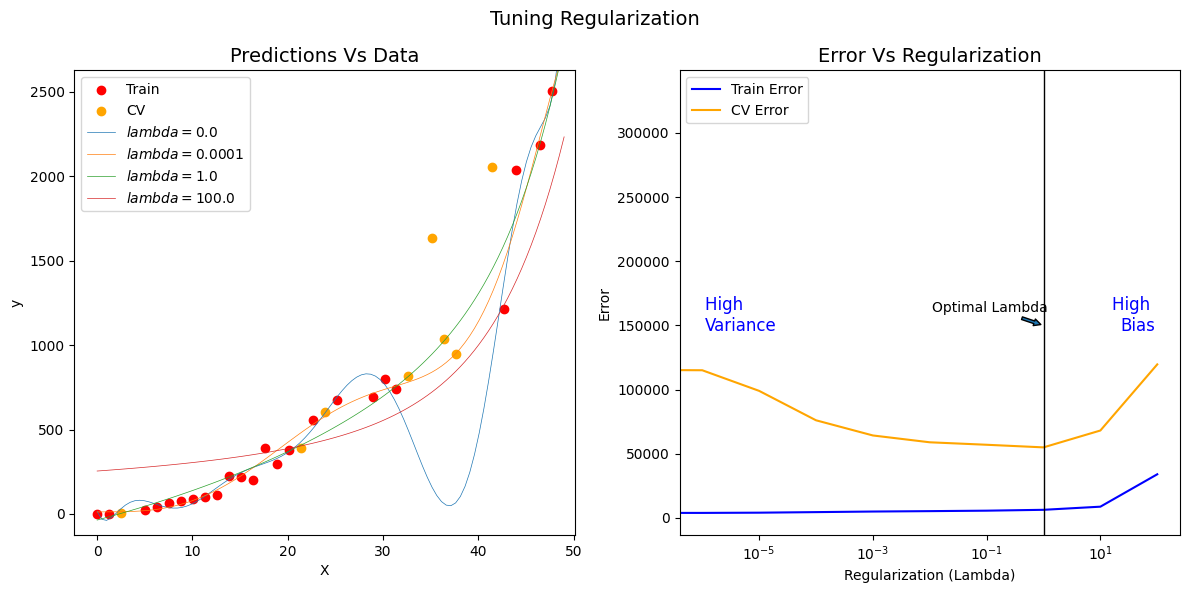

In [17]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].set_title("Predictions Vs Data", fontsize=14)
ax[0].set_xlabel("X")
ax[0].set_ylabel("y")

ax[0].scatter(X_train, y_train, color="red", label="Train")
ax[0].scatter(X_cv, y_cv, color="orange", label="CV")
ax[0].set_xlim(ax[0].get_xlim())
ax[0].set_ylim(ax[0].get_ylim())

for i in (0,3,7,9):
    ax[0].plot(x, y_pred[:,i], lw=0.5, label=f"$lambda =${lambda_list[i]}")
ax[0].legend()

ax[1].set_title("Error Vs Regularization", fontsize=14)
ax[1].plot(lambda_list, train_err[:], label="Train Error", color="blue")
ax[1].plot(lambda_list, cv_err[:], label="CV Error", color="orange")

ax[1].set_xscale('log')
ax[1].set_ylim(*ax[1].get_ylim())

opt_x = lambda_list[optimal_reg_index]

ax[1].vlines(opt_x, *ax[1].get_ylim(), color="black", lw=1)
ax[1].annotate("Optimal Lambda", (opt_x, 150000), xytext=(-80,10), textcoords="offset points", arrowprops={'arrowstyle':'simple'})

ax[1].set_xlabel("Regularization (Lambda)")
ax[1].set_ylabel("Error")

fig.suptitle("Tuning Regularization", fontsize=14)

ax[1].text(0.05, 0.44, "High \nVariance", fontsize=12, ha='left', transform=ax[1].transAxes, color="blue")
ax[1].text(0.95, 0.44, "High \nBias", fontsize=12, ha='right', transform=ax[1].transAxes, color="blue")
ax[1].legend(loc="upper left")

plt.tight_layout()
plt.show()

## **Neural Network without and with Regularization**

In [18]:
X, y, centers, classes, std = gen_blob()
print("X.shape: ", X.shape, "y.shape: ", y.shape)

X.shape:  (800, 2) y.shape:  (800,)


In [19]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.50, random_state=1)
print("X_train.shape: ", X_train.shape, "y_train.shape: ", y_train.shape)

X_train.shape:  (400, 2) y_train.shape:  (400,)


In [20]:
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.20, random_state=1)
print("X_cv.shape: ", X_cv.shape, "y_cv.shape: ", y_cv.shape)
print("X_test.shape: ", X_test.shape, "y_test.shape: ", y_test.shape)

X_cv.shape:  (320, 2) y_cv.shape:  (320,)
X_test.shape:  (80, 2) y_test.shape:  (80,)
